In [2]:
!pip install Roboflow
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [6]:
from IPython import display
display.clear_output()

In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [8]:
%cd {HOME}
!yolo task = detect mode = predict model = yolov8n.pt conf = 0.25 source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg' save = True

/content
100% 6.23M/6.23M [00:00<00:00, 124MB/s]

2023-12-25 13:42:14.375040: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 13:42:14.375114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 13:42:14.376449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 13:42:15.424293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<0

In [9]:
model = YOLO(f"{HOME}/yolov8n.pt")

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [11]:
from roboflow import Roboflow

rf = Roboflow(api_key = "oWgIIYaS3d6CRLFd22FD")
project = rf.workspace("thesis-l1ufi").project("peopledetection-qyok3")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PeopleDetection-5 in yolov8:: 100%|██████████| 4436/4436 [00:00<00:00, 5565.28it/s]


In [12]:
%cd {HOME}
!yolo task = detect mode = train model = yolov8s.pt data = {dataset.location}/data.yaml epochs = 15 imgsz = 640 plots = True

/content
100% 21.5M/21.5M [00:00<00:00, 247MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/PeopleDetection-5/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

/content


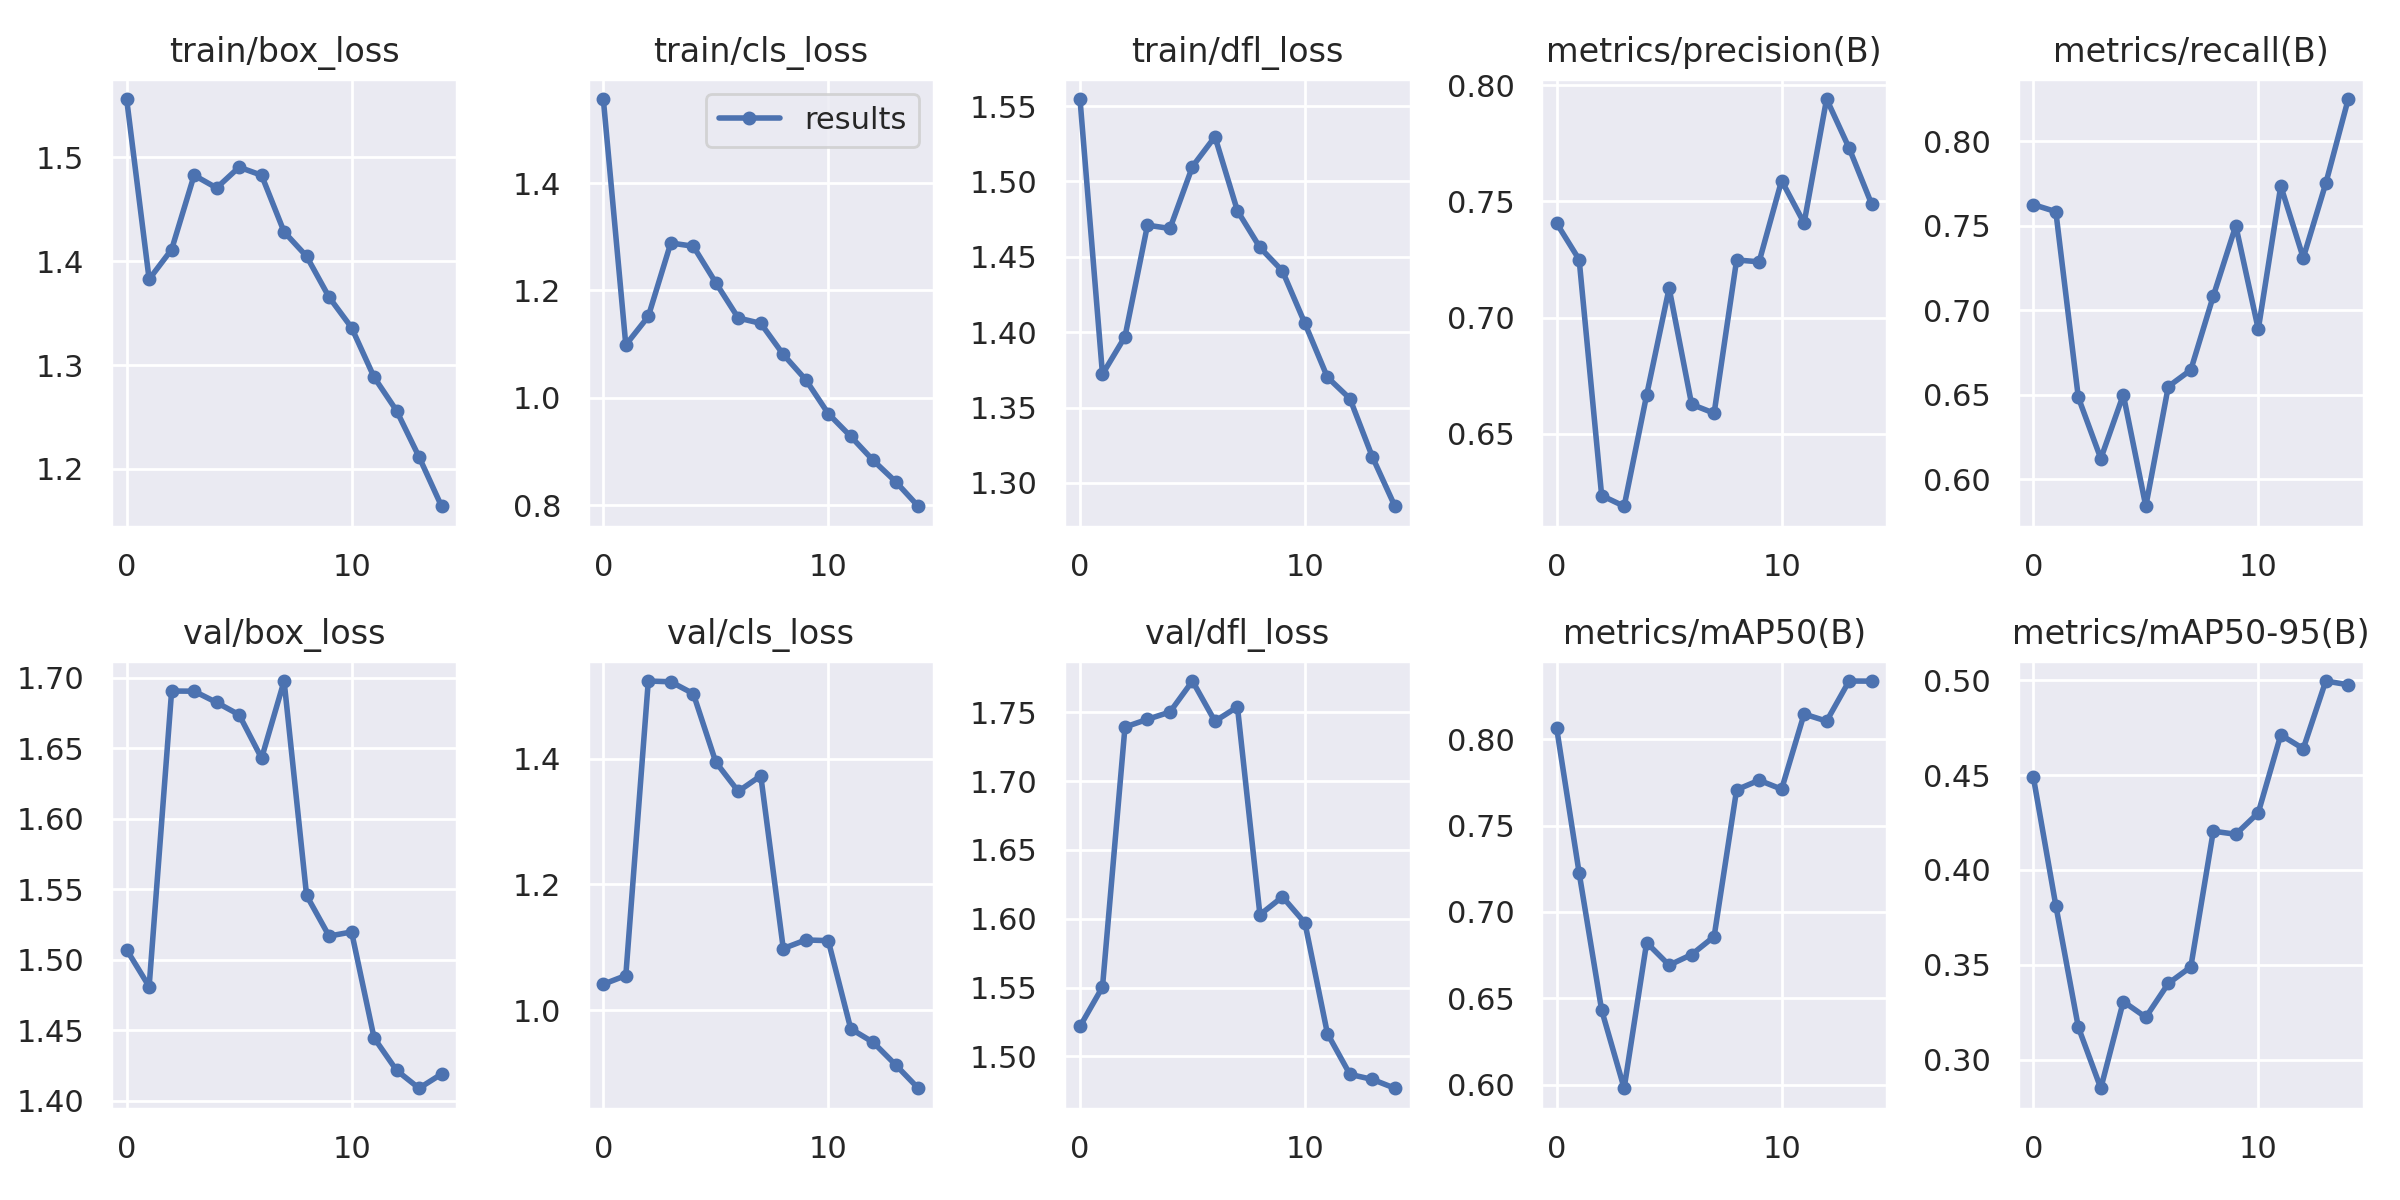

In [13]:
%cd {HOME}
Image(filename = f"{HOME}/runs/detect/train/confusion_matrix.png")
Image(filename = f"{HOME}/runs/detect/train/results.png")

/content


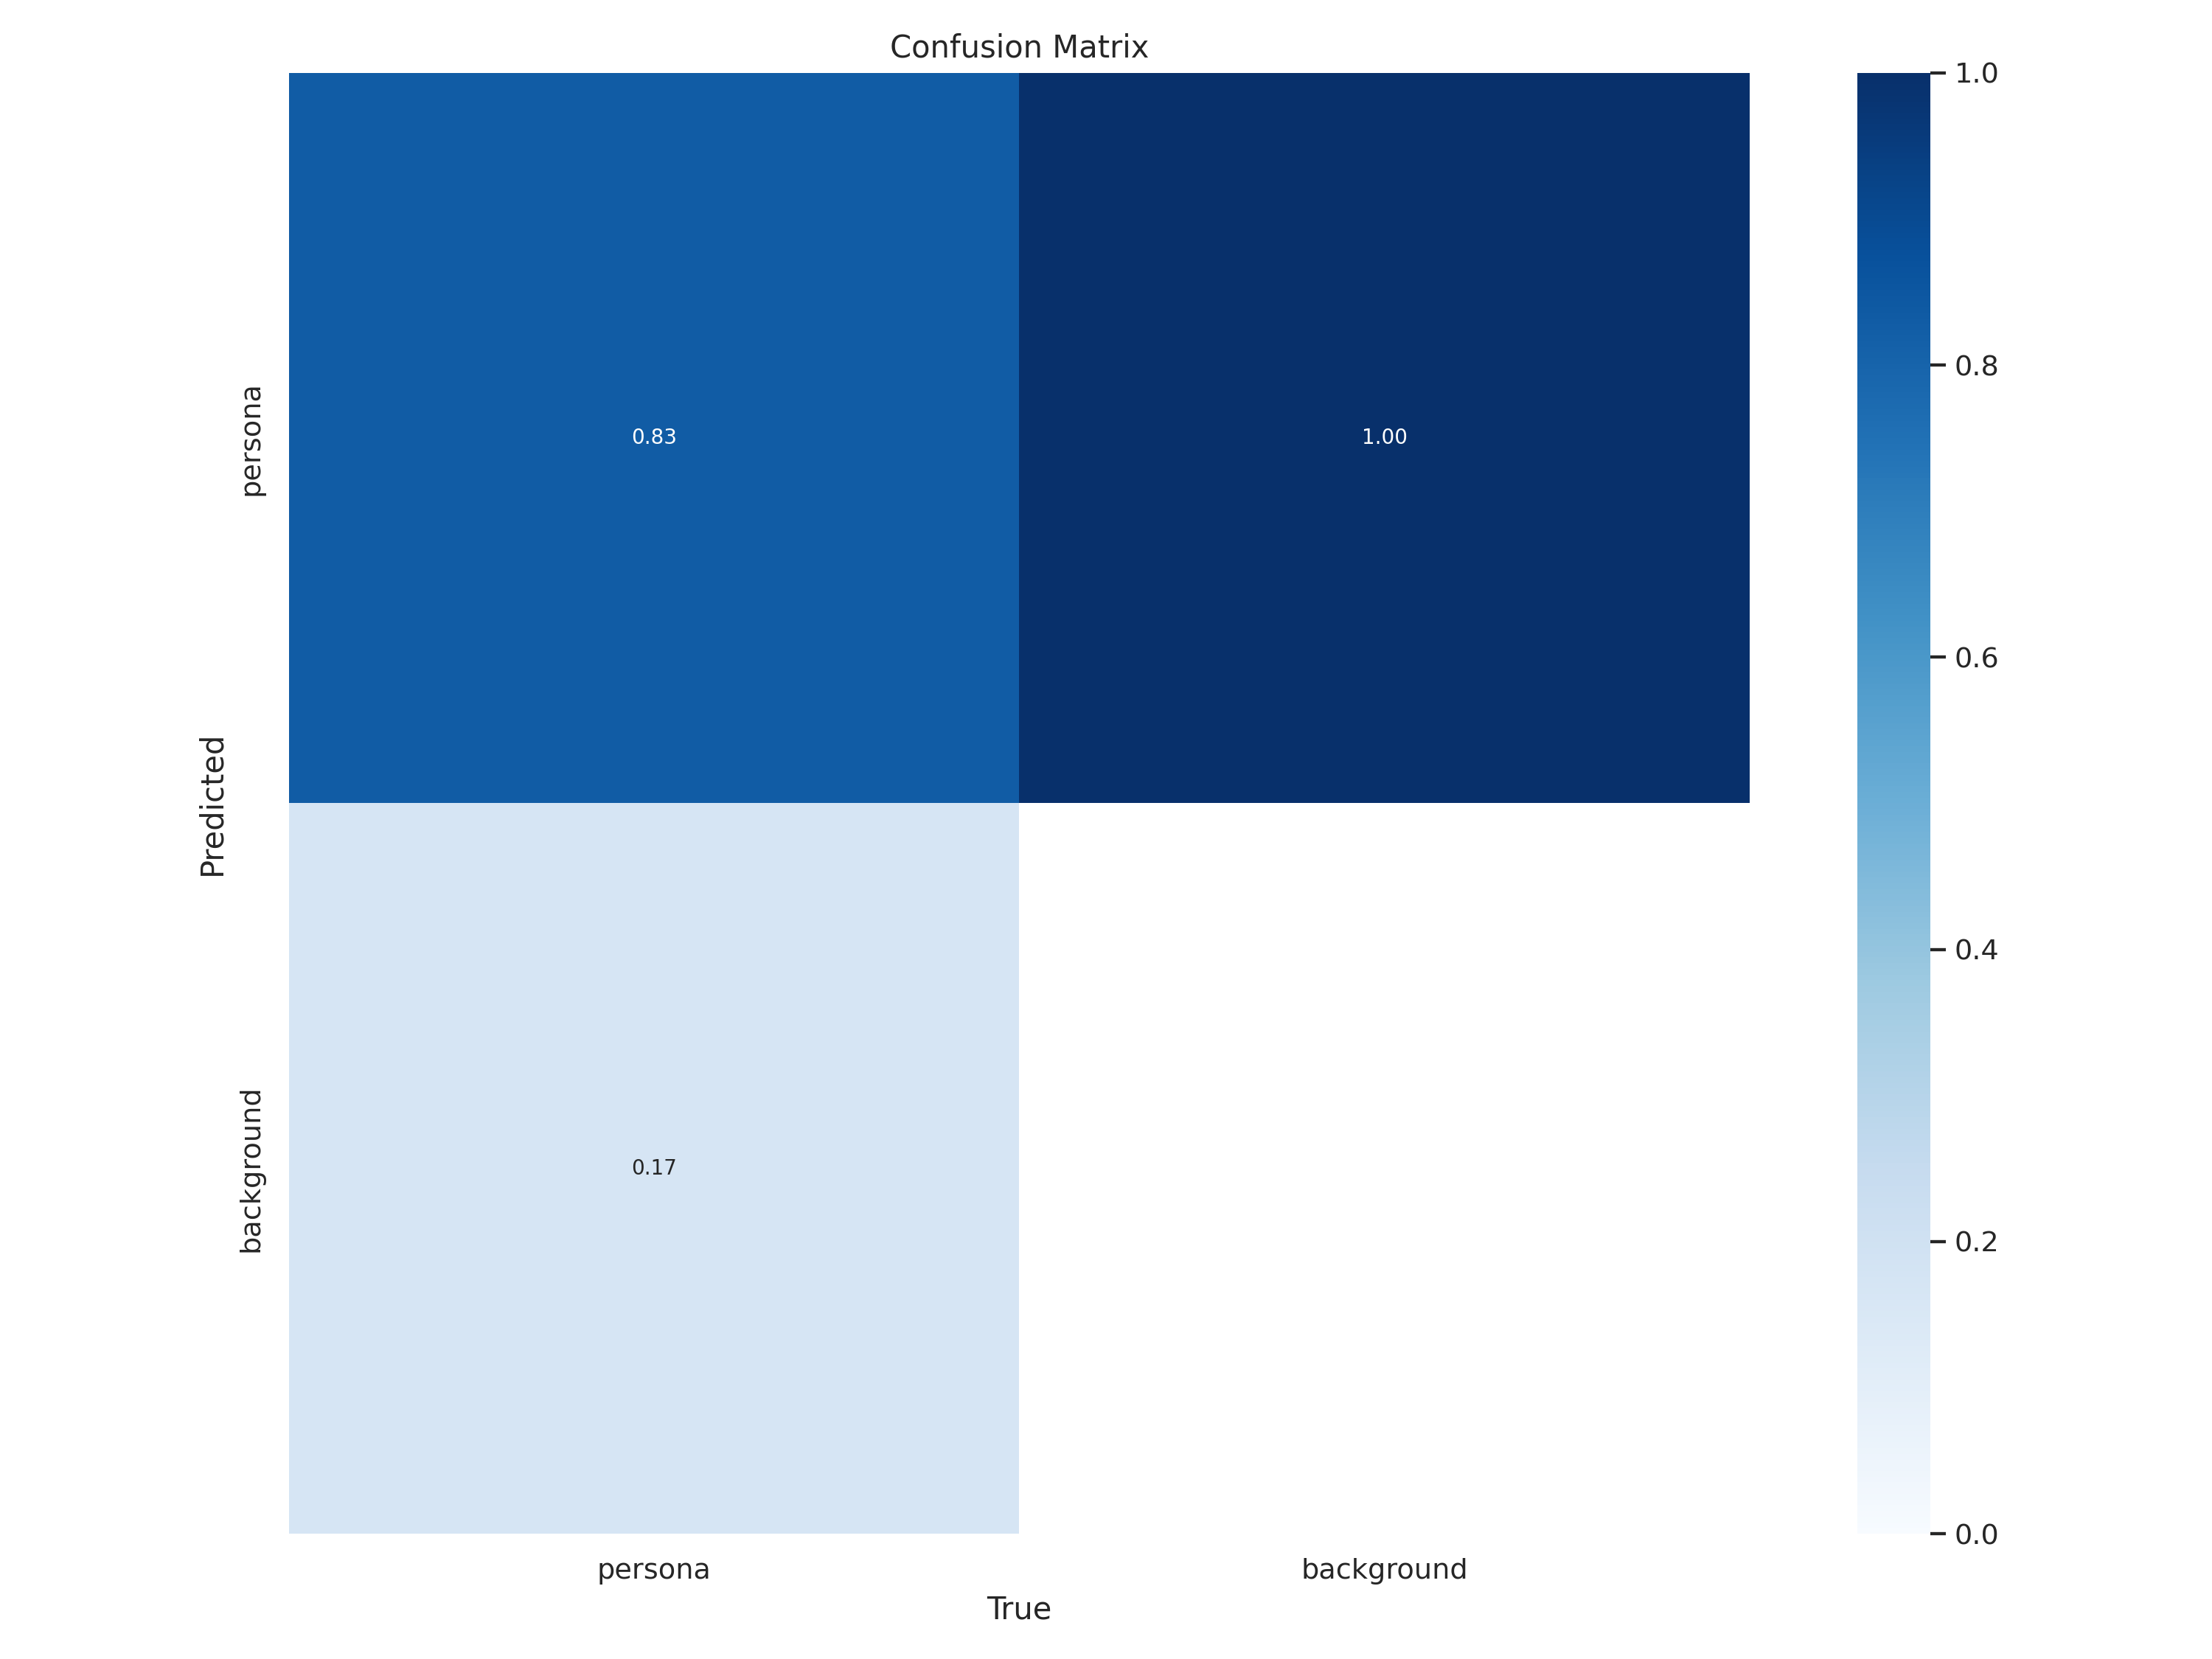

In [14]:
%cd {HOME}
Image(filename = f"{HOME}/runs/detect/train/confusion_matrix.png")

/content


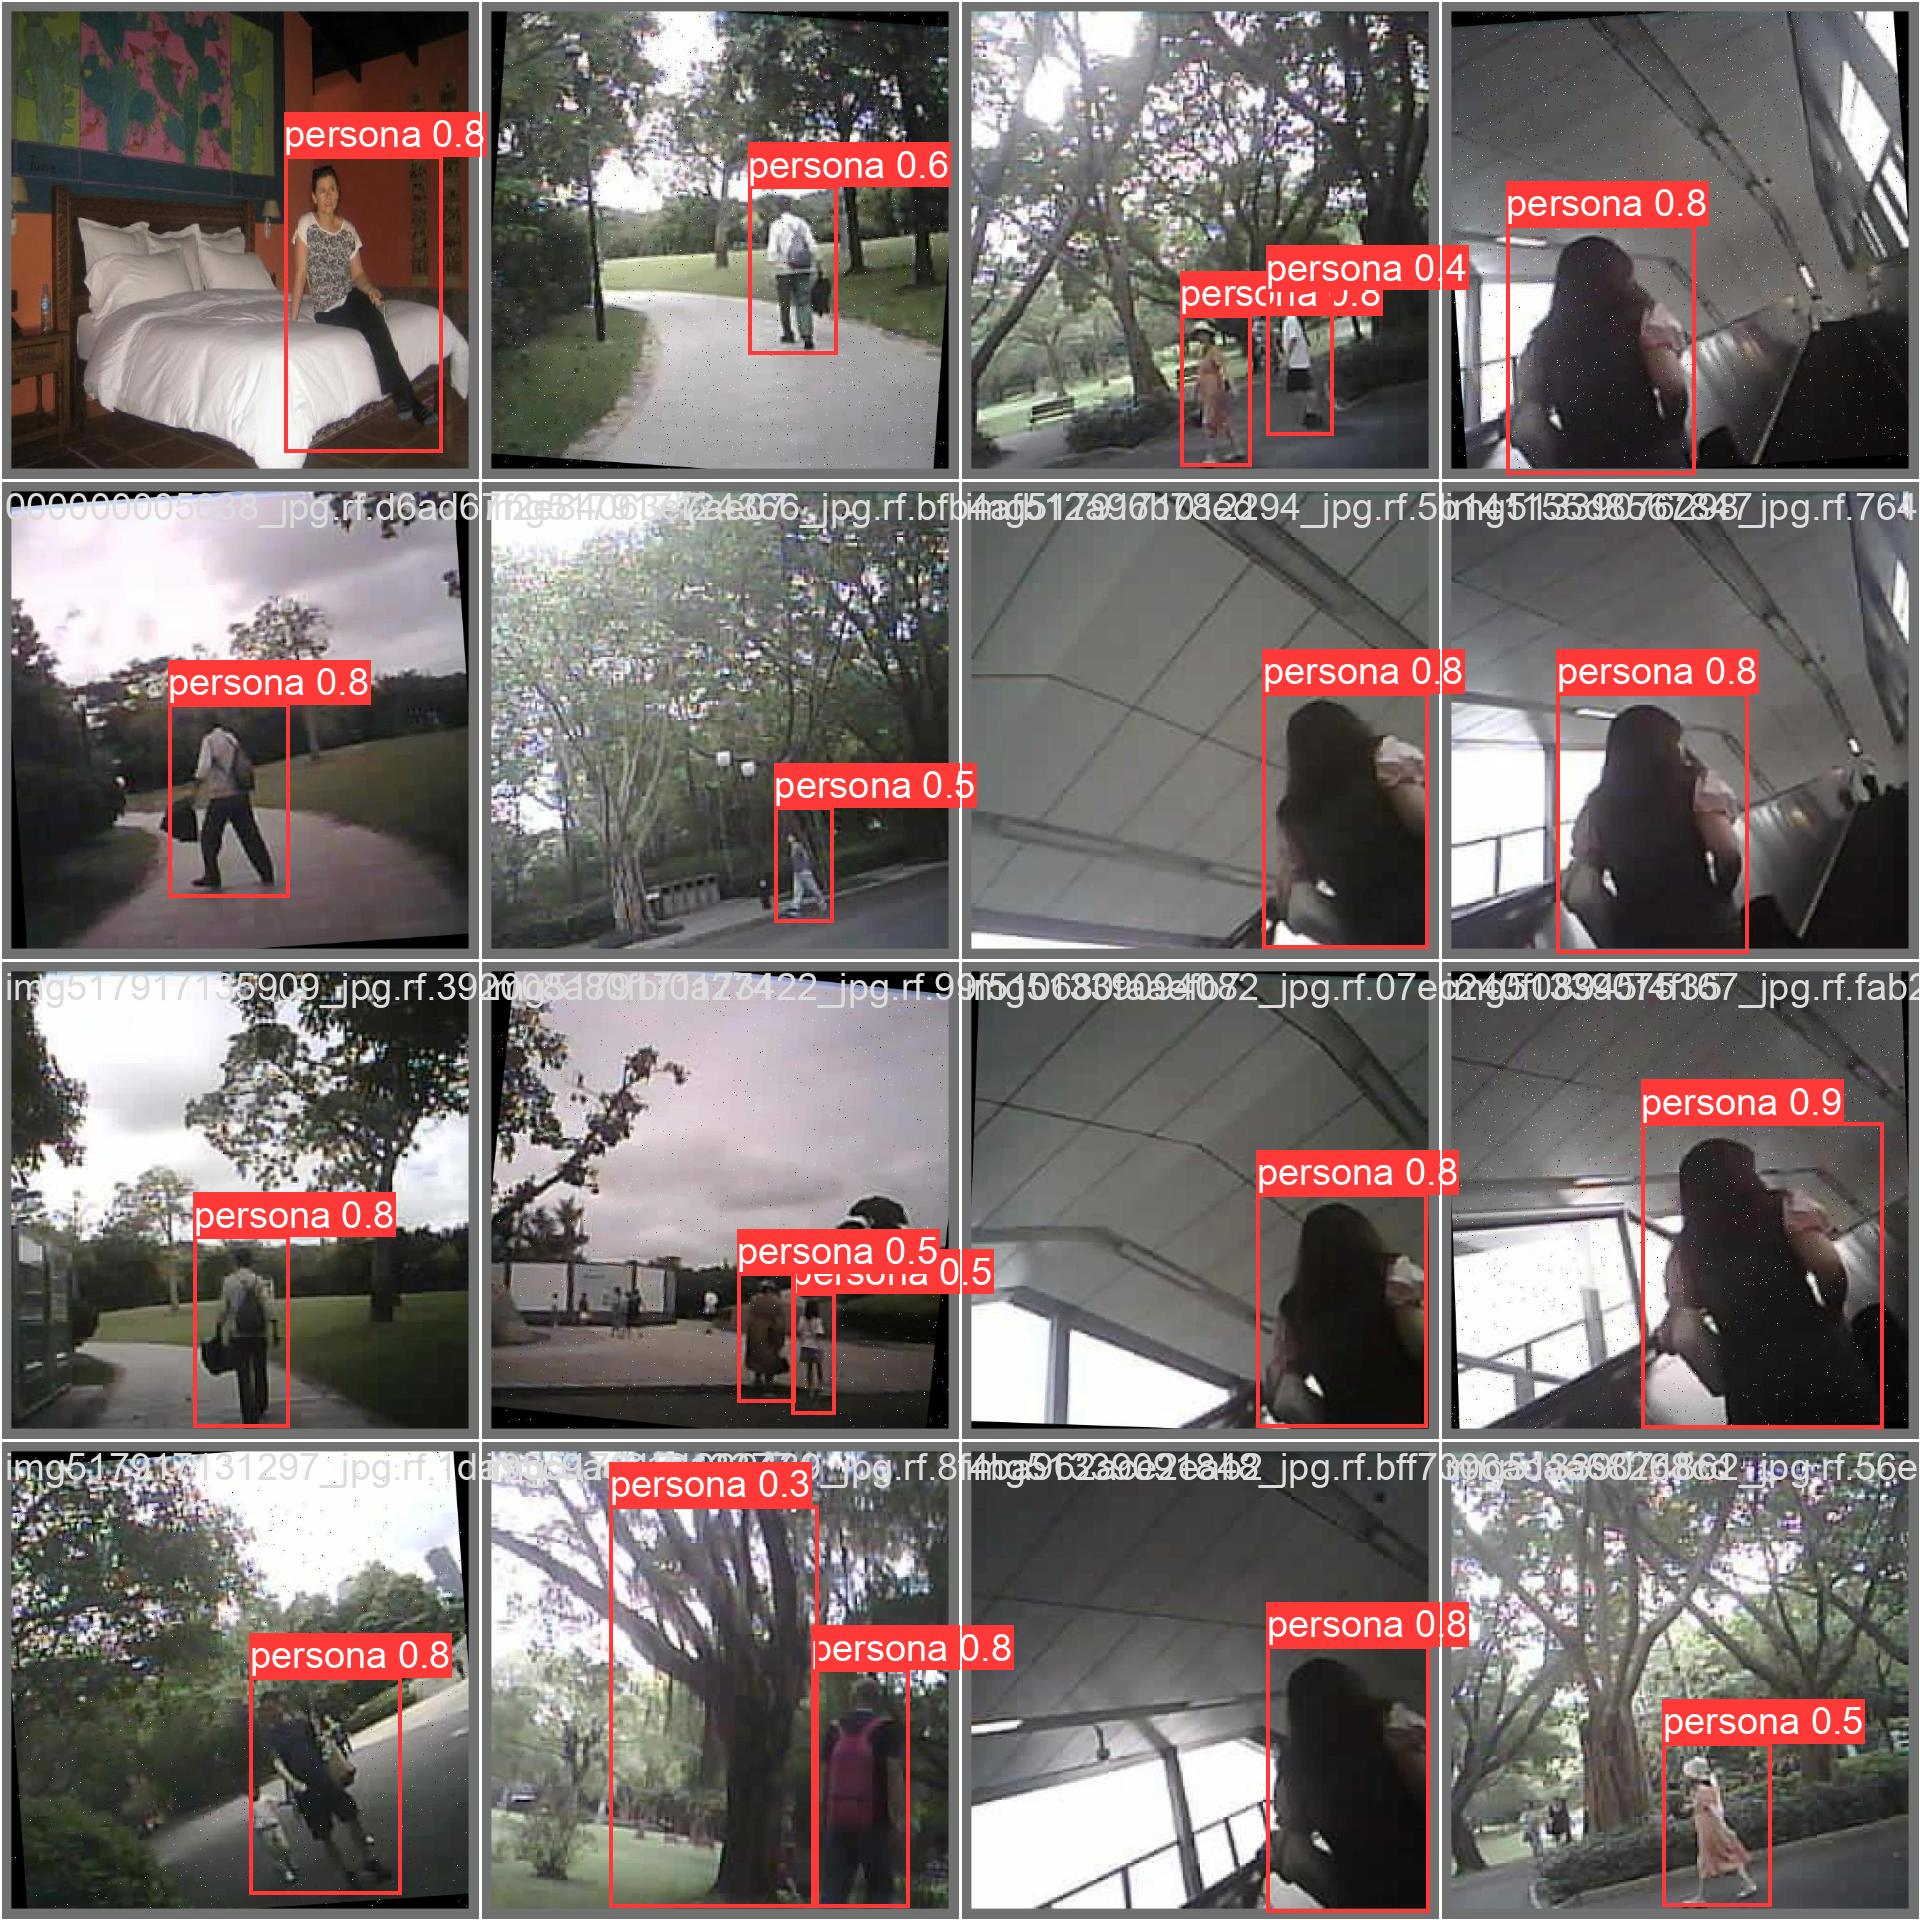

In [15]:
%cd {HOME}
Image(filename = f"{HOME}/runs/detect/train/val_batch0_pred.jpg")

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.1 source={dataset.location}/test/images save=True

/content
2023-12-25 14:11:29.628191: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 14:11:29.628242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 14:11:29.629586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 14:11:30.679148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/97 /content/da

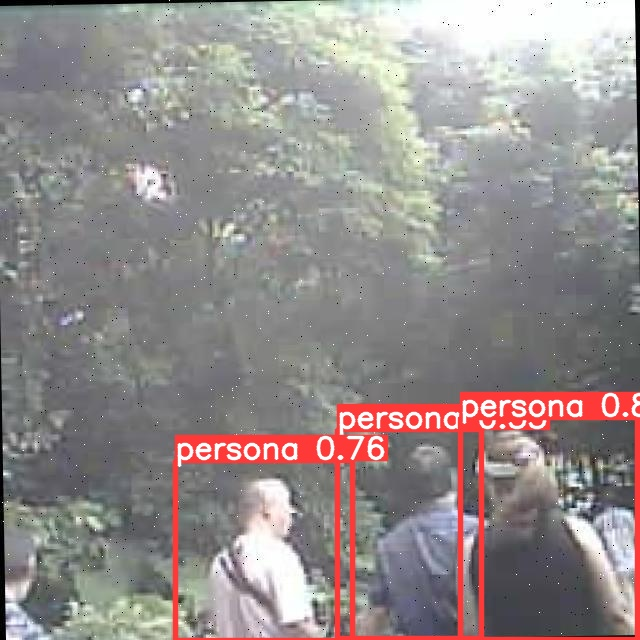

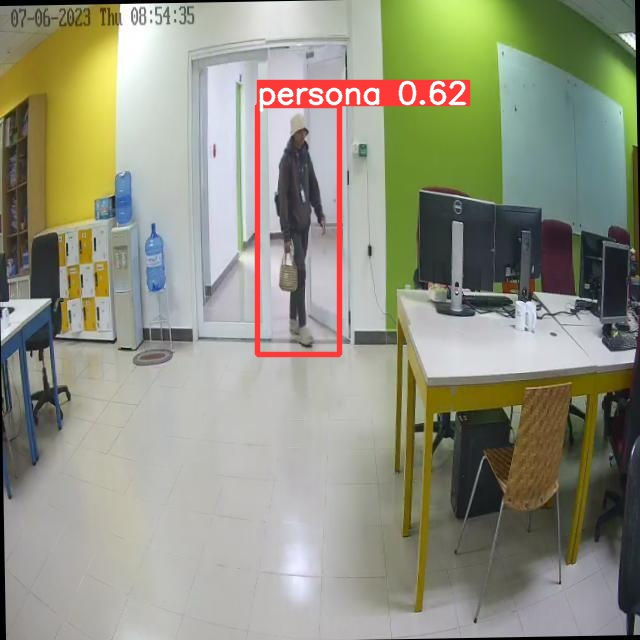

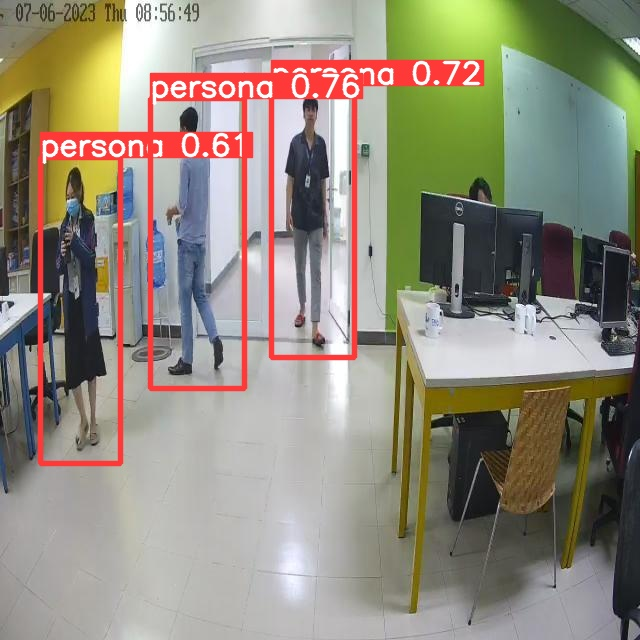

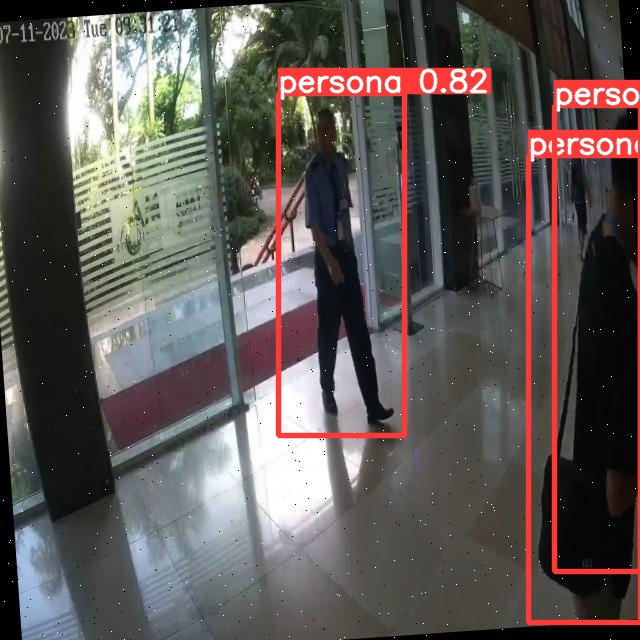

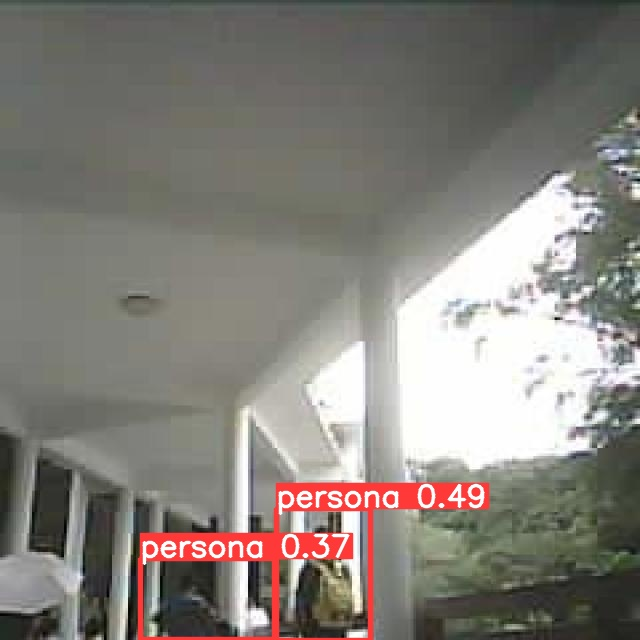

In [21]:
from glob import glob
for im_path in glob(f"{HOME}/runs/detect/predict3/*.jpg")[:5]:
  display(Image(filename = im_path, width = 450))
  print("\n")